<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   price      1436 non-null   int64 
 1   age_08_04  1436 non-null   int64 
 2   km         1436 non-null   int64 
 3   fuel_type  1436 non-null   object
 4   hp         1436 non-null   int64 
 5   automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   doors      1436 non-null   int64 
 8   cylinders  1436 non-null   int64 
 9   gears      1436 non-null   int64 
 10  weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
   price  age_08_04     km fuel_type  hp  automatic    cc  doors  cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950    

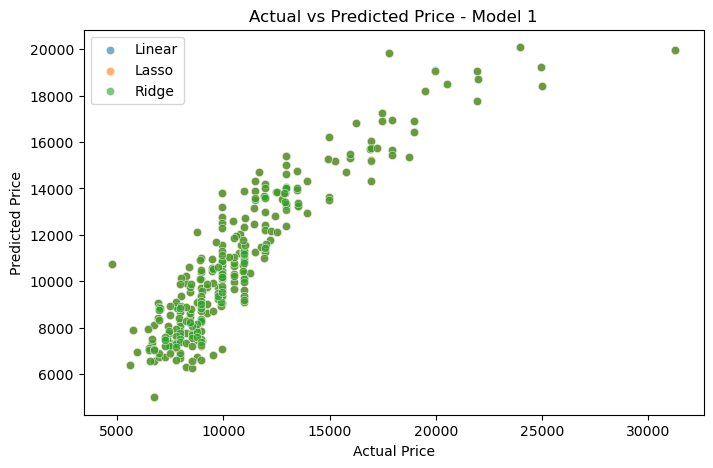


Model 2 - Linear Regression R² Score: 0.8156
Model 2 - Lasso Regression R² Score: 0.8156
Model 2 - Ridge Regression R² Score: 0.8155


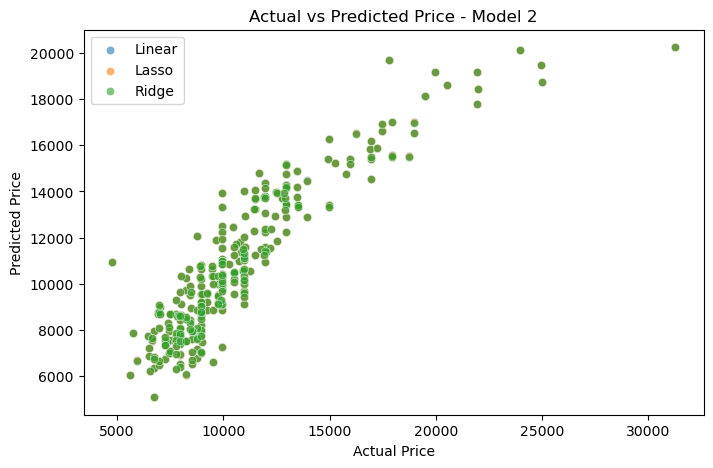


Model 3 - Linear Regression R² Score: 0.8517
Model 3 - Lasso Regression R² Score: 0.8517
Model 3 - Ridge Regression R² Score: 0.8517


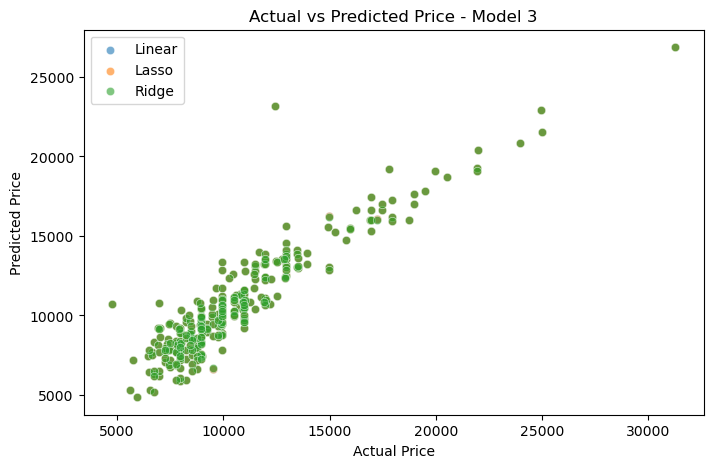

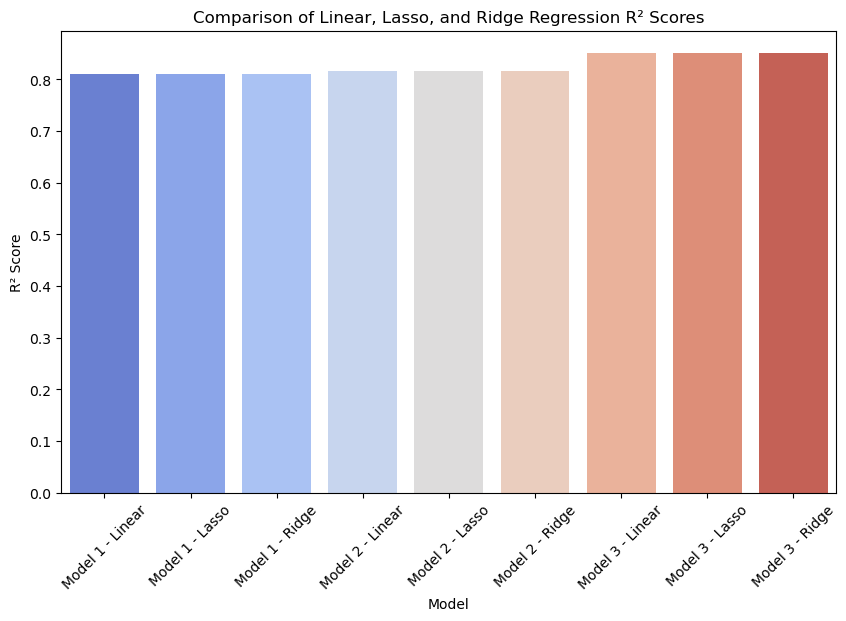

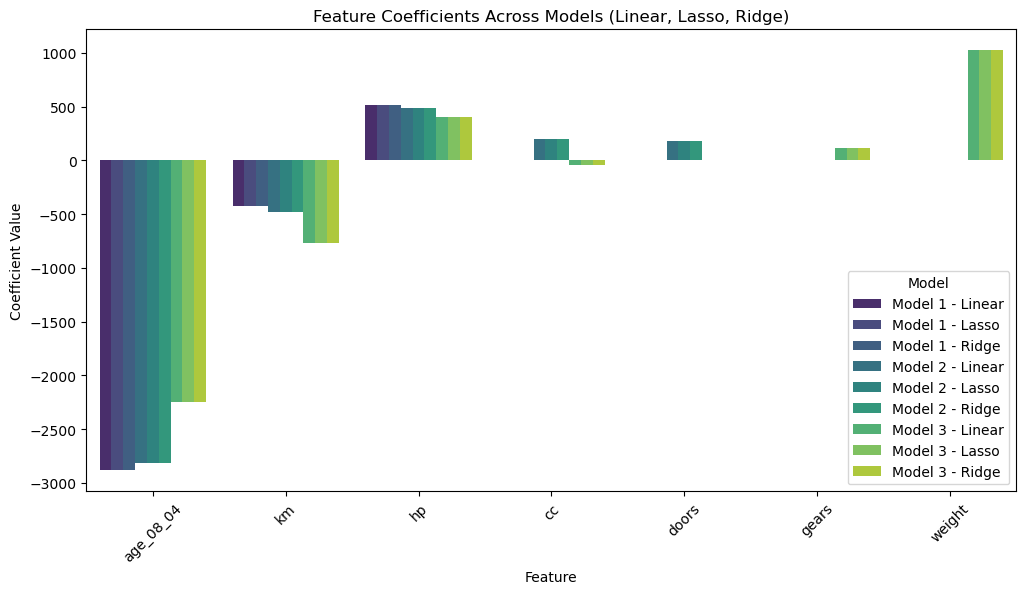

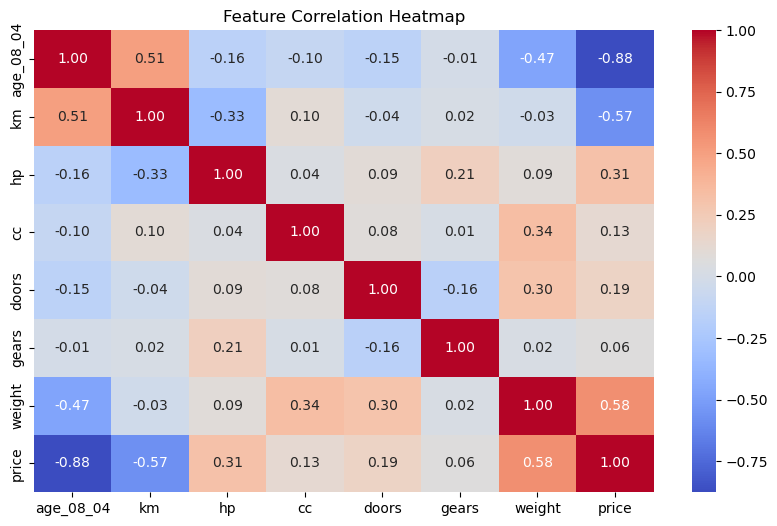

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

# Load dataset
FILE_PATH = r"D:\Data since couress\MLR\MLR\ToyotaCorolla - MLR.csv"
df = pd.read_csv(FILE_PATH)

# Standardizing column names
df.columns = df.columns.str.strip().str.lower()

# Display basic info and first few rows
print(df.info())
print(df.head())

# Handling missing values
df.dropna(inplace=True)

# Feature selection
selected_features = ['age_08_04', 'km', 'hp', 'cc', 'doors', 'gears', 'weight']

# Validate column names
def validate_columns(df, selected_features):
    missing_columns = [col for col in selected_features if col not in df.columns]
    if missing_columns:
        print(f"Warning! The following columns are missing: {missing_columns}")
        print("Please verify the dataset and correct column names.")
        return False
    return True

# Proceed only if columns are valid
if validate_columns(df, selected_features) and 'price' in df.columns:
    X = df[selected_features].copy()
    y = df['price'].copy()

    # Handle missing values
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # -------------------- Multiple Regression Models --------------------

    feature_sets = {
        "Model 1": ['age_08_04', 'km', 'hp'],
        "Model 2": ['age_08_04', 'km', 'hp', 'cc', 'doors'],
        "Model 3": ['age_08_04', 'km', 'hp', 'cc', 'doors', 'gears', 'weight']
    }

    results = {}
    r2_scores = []
    model_names = []
    coefficient_data = []

    for model_name, features in feature_sets.items():
        X_train_subset = X_train[features]
        X_test_subset = X_test[features]

        # Scale subset features
        X_train_scaled_subset = scaler.fit_transform(X_train_subset)
        X_test_scaled_subset = scaler.transform(X_test_subset)

        # Train Linear Regression model
        linear_model = LinearRegression()
        linear_model.fit(X_train_scaled_subset, y_train)
        y_pred_linear = linear_model.predict(X_test_scaled_subset)
        r2_linear = r2_score(y_test, y_pred_linear)

        # Train Lasso Regression model
        lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
        lasso_model.fit(X_train_scaled_subset, y_train)
        y_pred_lasso = lasso_model.predict(X_test_scaled_subset)
        r2_lasso = r2_score(y_test, y_pred_lasso)

        # Train Ridge Regression model
        ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
        ridge_model.fit(X_train_scaled_subset, y_train)
        y_pred_ridge = ridge_model.predict(X_test_scaled_subset)
        r2_ridge = r2_score(y_test, y_pred_ridge)

        # Store results
        results[model_name] = {
            "Linear R² Score": r2_linear,
            "Lasso R² Score": r2_lasso,
            "Ridge R² Score": r2_ridge,
            "Linear Coefficients": dict(zip(features, linear_model.coef_)),
            "Lasso Coefficients": dict(zip(features, lasso_model.coef_)),
            "Ridge Coefficients": dict(zip(features, ridge_model.coef_))
        }

        r2_scores.extend([r2_linear, r2_lasso, r2_ridge])
        model_names.extend([f"{model_name} - Linear", f"{model_name} - Lasso", f"{model_name} - Ridge"])

        print(f"\n{model_name} - Linear Regression R² Score: {r2_linear:.4f}")
        print(f"{model_name} - Lasso Regression R² Score: {r2_lasso:.4f}")
        print(f"{model_name} - Ridge Regression R² Score: {r2_ridge:.4f}")

        # Store coefficients for visualization
        for feature, coef in zip(features, linear_model.coef_):
            coefficient_data.append({"Model": f"{model_name} - Linear", "Feature": feature, "Coefficient": coef})
        for feature, coef in zip(features, lasso_model.coef_):
            coefficient_data.append({"Model": f"{model_name} - Lasso", "Feature": feature, "Coefficient": coef})
        for feature, coef in zip(features, ridge_model.coef_):
            coefficient_data.append({"Model": f"{model_name} - Ridge", "Feature": feature, "Coefficient": coef})

        # -------------------- Actual vs Predicted Plot --------------------
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=y_test, y=y_pred_linear, label="Linear", alpha=0.6)
        sns.scatterplot(x=y_test, y=y_pred_lasso, label="Lasso", alpha=0.6)
        sns.scatterplot(x=y_test, y=y_pred_ridge, label="Ridge", alpha=0.6)
        plt.xlabel("Actual Price")
        plt.ylabel("Predicted Price")
        plt.title(f"Actual vs Predicted Price - {model_name}")
        plt.legend()
        plt.show()

    # -------------------- Graphs --------------------

    # Bar Plot of Model R² Scores
    plt.figure(figsize=(10, 6))
    #sns.barplot(x=model_names, y=r2_scores, palette="coolwarm")
    sns.barplot(x=model_names, y=r2_scores, hue=model_names, palette="coolwarm", legend=False)
    plt.xticks(rotation=45)
    plt.xlabel("Model")
    plt.ylabel("R² Score")
    plt.title("Comparison of Linear, Lasso, and Ridge Regression R² Scores")
    plt.show()

    # Coefficient Bar Chart
    coef_df = pd.DataFrame(coefficient_data)
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Feature", y="Coefficient", hue="Model", data=coef_df, palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Coefficient Value")
    plt.title("Feature Coefficients Across Models (Linear, Lasso, Ridge)")
    plt.legend(title="Model")
    plt.show()

    # Heatmap for correlation
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[selected_features + ['price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()